In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**DataSet**

In [2]:
df=pd.read_csv("Sleep_Efficiency.csv")

In [3]:
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,25,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,21,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,30,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,70,10,3.0,0.0,0.0,No,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [5]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [9]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])

In [10]:
df["Bedtime"] = df["Bedtime"].dt.strftime(' %H.%M ')
df["Wakeup time"] = df["Wakeup time"].dt.strftime(' %H.%M ')

In [11]:
df["Wakeup time"]

0       07.00 
1       09.00 
2       05.30 
3       08.30 
4       09.00 
        ...   
447     05.30 
448     03.00 
449     07.30 
450     04.00 
451     10.00 
Name: Wakeup time, Length: 452, dtype: object

In [12]:
col=['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency']
for i in col:
  print(df[i].unique())
  print(df[i].value_counts())
  print("___________________")

[65 69 40 57 36 27 53 41 11 50 55 30 28 32 21 43 52 24 29 63 35 23 47 18
 26 37 46 61 38 20 58 31 34  9 16 54 56 25 44 66 48 45 39 51 22 15 19 33
 42 68 14 49 62 64 59 10 13 60 67 17 12]
Age
52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: count, Length: 61, dtype: int64
___________________
['Female' 'Male']
Gender
Male      228
Female    224
Name: count, dtype: int64
___________________
[' 01.00 ' ' 02.00 ' ' 21.30 ' ' 02.30 ' ' 21.00 ' ' 00.30 ' ' 22.30 '
 ' 01.30 ' ' 22.00 ' ' 23.00 ' ' 00.00 ']
Bedtime
 00.00     75
 22.00     56
 23.00     55
 21.00     38
 01.00     35
 21.30     35
 00.30     35
 02.00     32
 02.30     32
 01.30     32
 22.30     27
Name: count, dtype: int64
___________________
[' 07.00 ' ' 09.00 ' ' 05.30 ' ' 08.30 ' ' 04.30 ' ' 03.00 ' ' 10.30 '
 ' 10.00 ' ' 06.00 ' ' 11.30 ' ' 09.30 ' ' 08.00 ' ' 06.30 ' ' 07.30 '
 ' 05.00 ' ' 04.00 ' ' 03.30 ' ' 11.00 ' ' 12.30 ']
Wakeup time
 09.00     49
 07.00     4

In [13]:
df.Awakenings.fillna(value = df.Awakenings.mean(),inplace = True)
df["Caffeine consumption"].fillna(value = df["Caffeine consumption"].mean(), inplace = True)
df["Alcohol consumption"].fillna(value = df["Alcohol consumption"].mean(), inplace = True)
df["Exercise frequency"].fillna(value = df["Exercise frequency"].mean(), inplace = True)

In [14]:
continuous_columns = ["Age", "Sleep duration", "Sleep efficiency",	"REM sleep percentage",	"Deep sleep percentage",
                      "Light sleep percentage",	"Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]
category_columns = ["Gender", "Bedtime", "Wakeup time", "Smoking status"]

In [15]:
df.drop("ID", axis = 1, inplace = True)

In [16]:
df1=df.drop(["Gender", "Bedtime", "Wakeup time", "Smoking status"],axis=1)

In [17]:
df1.corr()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
Age,1.000000,-0.062462,0.098357,-0.020479,0.015070,-0.044623,-0.017468,-0.168273,-0.040150,0.071892
Sleep duration,-0.062462,1.000000,-0.027467,0.005819,-0.029449,0.033588,0.004829,-0.014542,-0.011797,-0.067903
Sleep efficiency,0.098357,-0.027467,1.000000,0.090021,0.792730,-0.820629,-0.554498,0.063121,-0.431834,0.257974
REM sleep percentage,-0.020479,0.005819,0.090021,1.000000,-0.148563,0.067830,-0.069534,0.121543,-0.091297,-0.003245
Deep sleep percentage,0.015070,-0.029449,0.792730,-0.148563,1.000000,-0.986315,-0.296267,-0.002880,-0.398274,0.169897
Light sleep percentage,-0.044623,0.033588,-0.820629,0.067830,-0.986315,1.000000,0.315149,-0.004531,0.414496,-0.193992
Awakenings,-0.017468,0.004829,-0.554498,-0.069534,-0.296267,0.315149,1.000000,-0.103769,0.205996,-0.212485
Caffeine consumption,-0.168273,-0.014542,0.063121,0.121543,-0.002880,-0.004531,-0.103769,1.000000,-0.141168,-0.064172
Alcohol consumption,-0.040150,-0.011797,-0.431834,-0.091297,-0.398274,0.414496,0.205996,-0.141168,1.000000,-0.037536
Exercise frequency,0.071892,-0.067903,0.257974,-0.003245,0.169897,-0.193992,-0.212485,-0.064172,-0.037536,1.000000


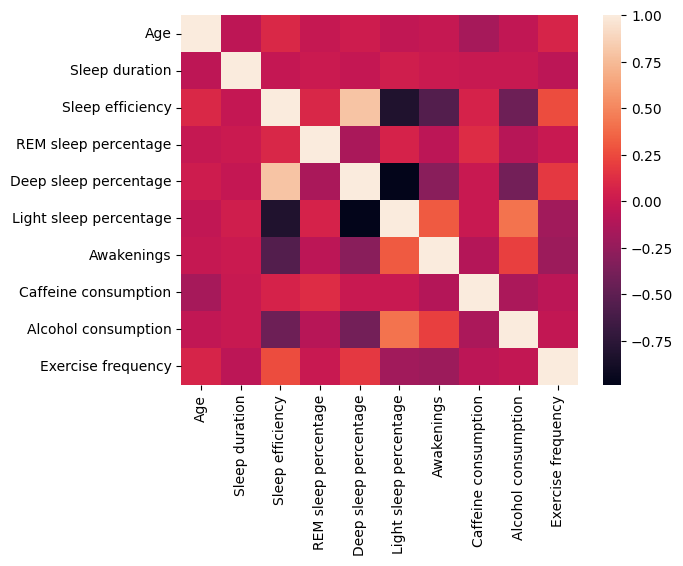

In [18]:
sns.heatmap(df1.corr())
plt.show()

In [19]:
#unsupervised data

**Hypothesis testing**


In [20]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df1[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)

In [21]:
res=[]
for i in continuous_columns:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,Age,40.285398,40.804000,H0-There is no significant difference,-0.339102,0.738686
1,Sleep duration,7.465708,7.450000,H0-There is no significant difference,0.126463,0.900849
2,Sleep efficiency,0.788916,0.784100,H0-There is no significant difference,-0.280372,0.782575
3,REM sleep percentage,23.002212,22.930000,H0-There is no significant difference,0.436367,0.668062
4,Deep sleep percentage,52.960177,53.120000,H0-There is no significant difference,-0.127175,0.900294
5,Light sleep percentage,24.831858,25.070000,H0-There is no significant difference,-0.469749,0.644504
6,Awakenings,1.641204,1.694366,H0-There is no significant difference,1.799959,0.089639
7,Caffeine consumption,23.653396,23.629977,H0-There is no significant difference,0.353764,0.727865
8,Alcohol consumption,1.245413,1.226872,H0-There is no significant difference,-0.115827,0.909147
9,Exercise frequency,1.791480,1.647498,H0-There is no significant difference,0.406789,0.689238


In [22]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [23]:
columns=continuous_columns
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,Age&Sleep duration,Ha-There is significant difference,21.767177,4.732449e-52,Ha-There is significant difference,94.126922,1.074835e-25
1,Age&Sleep efficiency,Ha-There is significant difference,29.386979,3.376875e-70,Ha-There is significant difference,52.813615,3.407341e-21
2,Age&REM sleep percentage,Ha-There is significant difference,12.257817,1.939439e-25,Ha-There is significant difference,32.872632,1.589872e-17
3,Age&Deep sleep percentage,Ha-There is significant difference,-6.883659,9.621005e-11,Ha-There is significant difference,-11.891549,5.839901e-10
4,Age&Light sleep percentage,Ha-There is significant difference,6.977935,5.692800e-11,Ha-There is significant difference,16.431133,2.779816e-12
5,Age&Awakenings,Ha-There is significant difference,28.338153,7.012828e-68,Ha-There is significant difference,63.331376,1.318135e-22
6,Age&Caffeine consumption,Ha-There is significant difference,3.299360,1.170463e-03,Ha-There is significant difference,8.157825,1.853434e-07
7,Age&Alcohol consumption,Ha-There is significant difference,27.119121,4.066085e-65,Ha-There is significant difference,64.972183,8.333620e-23
8,Age&Exercise frequency,Ha-There is significant difference,30.216090,5.430959e-72,Ha-There is significant difference,53.982539,2.303045e-21
9,Sleep duration&Sleep efficiency,Ha-There is significant difference,69.758195,3.331611e-131,Ha-There is significant difference,152.395309,1.859354e-29


In [24]:
def chi_square_test(category_column1,category_column2):
  result={}
  H0_accepted=0
  H0_rejected=0
  data1=pd.crosstab(df[category_column1],df[category_column2])
  observed_values=data1.values
  value=stats.chi2_contingency(observed_values)
  p_value=value[1]
  if p_value<0.05:
     H0_rejected+=1
  else:
    H0_accepted+=1
  if H0_accepted>H0_rejected:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is no relationship between two mentioned column" })
  else:
    result.update({
        'column':category_column1+"&"+category_column2,
        "chi_square_test": "There is relationship between two mentioned column" })

  return result

In [25]:
Category=category_columns
res2=[]
for i in range(len(Category)-1):
  category1=Category[i]
  for j in range(i+1,len(Category)):
      category2=Category[j]
      chi=chi_square_test(category1,category2)
      res2.append(chi)
pd.set_option('max_colwidth', None)
pd.DataFrame(res2)

,column,chi_square_test
0,Gender&Bedtime,There is no relationship between two mentioned column
1,Gender&Wakeup time,There is relationship between two mentioned column
2,Gender&Smoking status,There is relationship between two mentioned column
3,Bedtime&Wakeup time,There is relationship between two mentioned column
4,Bedtime&Smoking status,There is relationship between two mentioned column
5,Wakeup time&Smoking status,There is relationship between two mentioned column


In [26]:
def annova_test(continous_column,category_column):
   result={}
   H0_accepted=0
   H0_rejected=0
   group=df[category_column].unique()
   grp={}
   for i in group:
     grp[i]=df[continous_column][df[category_column]==i]
   f_value,p_value=stats.f_oneway(*grp.values())
   if p_value<0.05:
    H0_rejected+=1
   else:
     H0_accepted+=1
   if H0_accepted>H0_rejected:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is relationship between mentioned column"})
   else:
     result.update({
        'column':continous_column+"&"+category_column,
        "Annova_test": "There is no relationship between mentioned column"})

   return result

In [27]:
Category=category_columns
continous=continuous_columns
res3=[]
for i in continous:
  for j in Category:
    ann=annova_test(i,j)
    res3.append(ann)
pd.DataFrame(res3)

,column,Annova_test
0,Age&Gender,There is no relationship between mentioned column
1,Age&Bedtime,There is no relationship between mentioned column
2,Age&Wakeup time,There is no relationship between mentioned column
3,Age&Smoking status,There is relationship between mentioned column
4,Sleep duration&Gender,There is relationship between mentioned column
5,Sleep duration&Bedtime,There is no relationship between mentioned column
6,Sleep duration&Wakeup time,There is no relationship between mentioned column
7,Sleep duration&Smoking status,There is relationship between mentioned column
8,Sleep efficiency&Gender,There is relationship between mentioned column
9,Sleep efficiency&Bedtime,There is no relationship between mentioned column


In [29]:
df

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,Female,01.00,07.00,6.0,0.88,18,70,10,0.0,0.000000,0.0,Yes,3.0
1,69,Male,02.00,09.00,7.0,0.66,24,28,53,3.0,0.000000,3.0,Yes,3.0
2,40,Female,21.30,05.30,8.0,0.89,20,70,10,1.0,0.000000,0.0,No,3.0
3,40,Female,02.30,08.30,6.0,0.51,28,25,52,3.0,50.000000,5.0,Yes,1.0
4,57,Male,01.00,09.00,8.0,0.76,27,55,18,3.0,0.000000,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,Female,22.00,05.30,7.5,0.91,25,57,21,0.0,0.000000,0.0,No,5.0
448,52,Male,21.00,03.00,6.0,0.74,28,57,21,4.0,25.000000,0.0,No,3.0
449,40,Female,23.00,07.30,8.5,0.55,20,30,48,1.0,23.653396,3.0,Yes,0.0
450,45,Male,21.00,04.00,7.0,0.76,18,70,10,3.0,0.000000,0.0,No,3.0


In [30]:
df["Gender"] = df["Gender"].map({"Female": 101, "Male": 102})
df["Smoking status"] = df["Smoking status"].map({"Yes": 201, "No": 202})


In [31]:
total_wcss=[]
for i in range(1,50):
  model=KMeans(i)
  model.fit(df)
  total_wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [32]:
total_wcss

[742117.3444193255,
 489291.367223403,
 338655.35544677416,
 268223.8478912441,
 208496.83207283626,
 171482.68178401008,
 153682.66905317313,
 139578.52390946815,
 125290.82069230855,
 114205.38826294843,
 104169.72599346709,
 95944.71219689521,
 87546.06880656062,
 80231.03823893706,
 77655.10011673071,
 67274.39487549782,
 63411.485508787926,
 59807.20636729113,
 57332.47681934864,
 53539.26164507767,
 50308.27246285307,
 47848.6198472345,
 46485.61733811717,
 43002.33612832944,
 41870.92395737943,
 41009.70638610938,
 38154.50287453279,
 37406.9756755193,
 35155.96095975599,
 34070.945514869774,
 33410.92102467005,
 31443.63689621247,
 30635.072530743855,
 29601.96708680341,
 28502.462154966426,
 27760.071620092247,
 26994.24095736211,
 26237.28202000074,
 25870.141830598353,
 24359.1660469524,
 23761.437938069583,
 23376.852992668035,
 23158.233585624577,
 22320.12934135463,
 21742.924413008746,
 21232.201734970462,
 20399.79899057741,
 20490.12372039281,
 19788.367188102064]

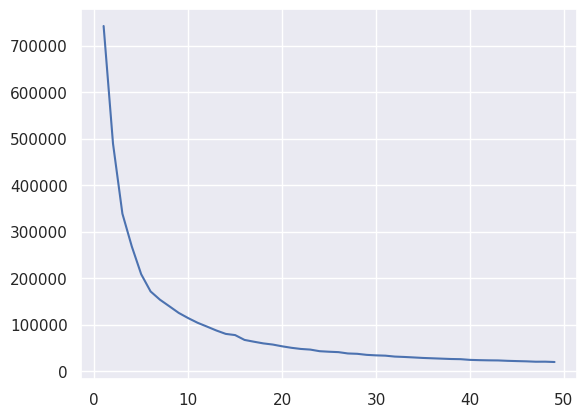

In [33]:
sns.set()
plt.plot(range(1,50),total_wcss)
plt.show()

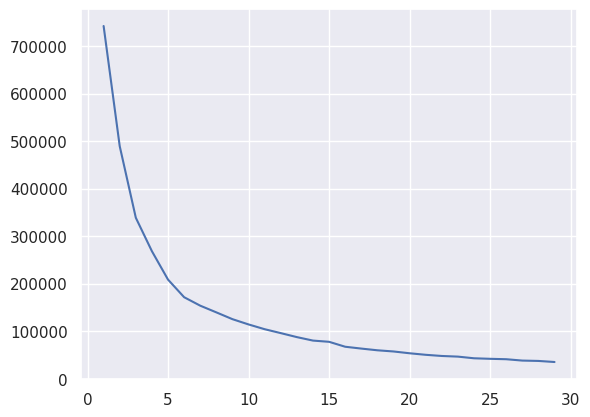

In [35]:
sns.set()
plt.plot(range(1,30),total_wcss[0:29])
plt.show()

In [36]:
result=KMeans(23).fit(df)
identify_cluster=result.fit_predict(df)
df["cluster"]=identify_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
df["cluster"].value_counts()

cluster
5     48
20    38
7     31
15    31
17    29
10    24
1     22
2     22
13    20
16    20
18    18
11    17
0     17
22    16
8     15
4     14
19    12
14    12
12    12
3     12
9      9
21     9
6      4
Name: count, dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    int64  
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              452 non-null    float64
 10  Caffeine consumption    452 non-null    float64
 11  Alcohol consumption     452 non-null    float64
 12  Smoking status          452 non-null    int64  
 13  Exercise frequency      452 non-null    float64
 14  cluster                 452 non-null    in

In [41]:
df2 = df.apply(pd.to_numeric, errors='coerce')

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    int64  
 2   Bedtime                 452 non-null    float64
 3   Wakeup time             452 non-null    float64
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              452 non-null    float64
 10  Caffeine consumption    452 non-null    float64
 11  Alcohol consumption     452 non-null    float64
 12  Smoking status          452 non-null    int64  
 13  Exercise frequency      452 non-null    float64
 14  cluster                 452 non-null    in

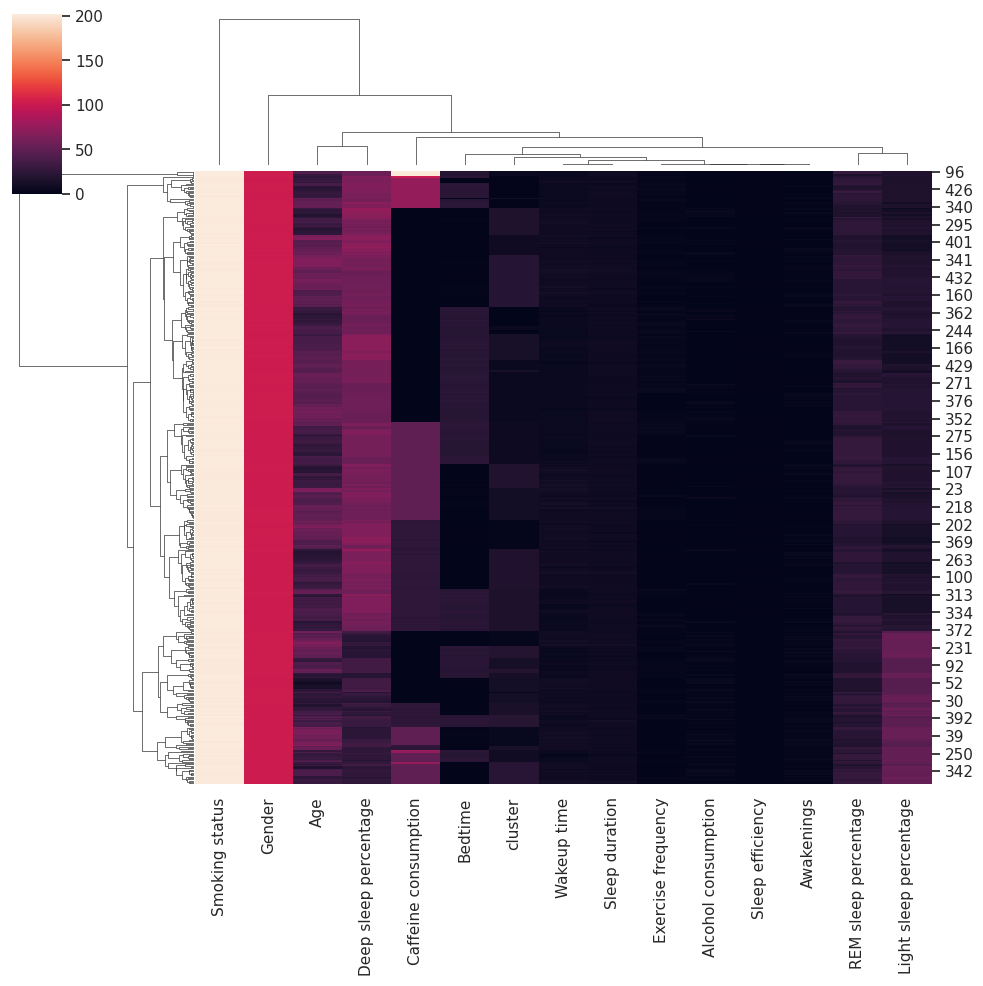

In [44]:
sns.clustermap(df2)

In [45]:
df[df["cluster"]==6]

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,cluster
62,29,102,21.00,05.00,8.0,0.81,15,57,18,1.0,200.0,0.0,202,1.79148,6
81,29,102,21.00,04.30,7.5,0.81,15,57,18,2.0,200.0,0.0,202,2.00000,6
96,41,102,21.00,04.00,7.0,0.96,28,55,17,0.0,200.0,0.0,202,3.00000,6
161,42,102,21.00,04.30,7.5,0.95,28,55,17,0.0,200.0,0.0,202,3.00000,6
